In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as scn
import numpy as np

import spacy
nlp = spacy.load("en_core_web_lg")

from time import perf_counter

from concurrent.futures import ProcessPoolExecutor

fake = pd.read_csv("data/Fake.csv")
real = pd.read_csv("data/True.csv")

fake.drop(columns=["date", "subject"], inplace=True)
real.drop(columns=["date", "subject"], inplace=True)

MAX_LEN = 100 #longest title is 54, longest text 9469
PADDING_CONST = -1e8

def max_len(sentence):
    return len(nlp(sentence))

def to_npy(sentence):
    """Converts spacy array to numpy arrays

    Args:
        A (spacy.tokens.doc.doc): Array of word vector

    Returns:
        np.array(len(A), 300): Word vector as np array
    """
    A = nlp(sentence)

    arr = np.empty((MAX_LEN,300,), dtype=np.float32)
    for i in np.arange(len(A)):
        arr[i] = A[i].vector
    for i in np.arange(len(A), MAX_LEN):
        arr[i] = PADDING_CONST*np.ones((300))
    return arr

with ProcessPoolExecutor(max_workers=24) as executor:
    x_train = list(executor.map(max_len, real["text"]))

# Don't forget about the fake as well

# arr = np.empty((48,-1,300,))
# for i in range(48):
#     arr[i] = x_real[i]

# https://datascience.stackexchange.com/questions/48796/how-to-feed-lstm-with-different-input-array-sizes

print(x_real.shape)
fake = pd.read_csv("data/Fake.csv")


NameError: name 'x_real' is not defined

(array([1.5875e+04, 5.0540e+03, 4.5800e+02, 2.0000e+01, 2.0000e+00,
        3.0000e+00, 3.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.0000e+00, 5.9320e+02, 1.1854e+03, 1.7776e+03, 2.3698e+03,
        2.9620e+03, 3.5542e+03, 4.1464e+03, 4.7386e+03, 5.3308e+03,
        5.9230e+03]),
 <BarContainer object of 10 artists>)

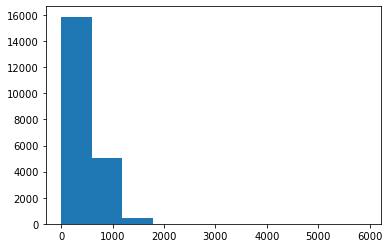

In [12]:
plt.hist(x_train)

In [14]:
def f(x):
    return x>4000
len(list(filter(f, x_train)))/len(x_train)

0.00014007564084605686

In [5]:
import pandas as pd
df = pd.read_csv("test_data/fake.csv")

In [6]:
df = df["text"]

In [4]:
df[1]

'Why Did Attorney General Loretta Lynch Plead The Fifth? Barracuda Brigade 2016-10-28 Print The administration is blocking congressional probe into cash payments to Iran. Of course she needs to plead the 5th. She either can’t recall, refuses to answer, or just plain deflects the question. Straight up corruption at its finest! \n100percentfedUp.com ; Talk about covering your ass! Loretta Lynch did just that when she plead the Fifth to avoid incriminating herself over payments to Iran…Corrupt to the core! Attorney General Loretta Lynch is declining to comply with an investigation by leading members of Congress about the Obama administration’s secret efforts to send Iran $1.7 billion in cash earlier this year, prompting accusations that Lynch has “pleaded the Fifth” Amendment to avoid incriminating herself over these payments, according to lawmakers and communications exclusively obtained by the Washington Free Beacon. \nSen. Marco Rubio (R., Fla.) and Rep. Mike Pompeo (R., Kan.) initiall

In [21]:
df.filter(type='str')

TypeError: filter() got an unexpected keyword argument 'type'

In [7]:
from preprocessing import to_npy
import numpy as np
from concurrent.futures import ProcessPoolExecutor
with ProcessPoolExecutor() as executor:
    X = list(executor.map(to_npy,df[:1000]))

In [8]:
X = np.array(X, dtype=np.float32)

In [9]:
from tensorflow.keras.models import load_model
model = load_model("model_full.h5")


In [10]:
model(X, training=False)

ResourceExhaustedError: OOM when allocating tensor with shape[1000,1000,300] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:Mul]

In [2]:
import pandas as pd
df = pd.read_csv("test_data/fake.csv")
df = df["title"]



In [4]:
df = df.dropna()

0        Muslims BUSTED: They Stole Millions In Gov’t B...
1        Re: Why Did Attorney General Loretta Lynch Ple...
2        BREAKING: Weiner Cooperating With FBI On Hilla...
3        PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...
4        FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...
                               ...                        
12908    Tesla Earnings Smash Expectations After Dramat...
12909     Rules For Rulers (Or How The World Really Works)
12910    Fact Check: Trump Is Right that Clinton Might ...
12911    Caught On Tape: ISIS Destroys Iraqi Abrams Wit...
12912    ObamaCare Architect Admits "The Law Is Working...
Name: title, Length: 12319, dtype: object

In [6]:
from preprocessing import to_npy, to_npy_2
import numpy as np
from concurrent.futures import ProcessPoolExecutor
with ProcessPoolExecutor() as executor:
    X = np.array(list(executor.map(to_npy_2,df[:200])),dtype=np.float32)
from tensorflow.keras.models import load_model
model = load_model("model-title.h5")
Y = model(X, training=False)
print(Y)
wrong = 0
for [e1, e2] in Y:
    if (e1 > e2):
        wrong += 1
print(wrong)

tf.Tensor(
[[0.01403478 0.98596525]
 [0.02946823 0.97053176]
 [0.04662749 0.9533725 ]
 [0.00253526 0.9974648 ]
 [0.00372743 0.99627256]
 [0.00294208 0.9970579 ]
 [0.00257593 0.9974241 ]
 [0.00224821 0.9977518 ]
 [0.00264449 0.9973556 ]
 [0.00222435 0.9977756 ]
 [0.00214608 0.99785393]
 [0.00227524 0.9977247 ]
 [0.00247397 0.997526  ]
 [0.00379312 0.9962069 ]
 [0.00214909 0.9978509 ]
 [0.00262327 0.9973768 ]
 [0.00233896 0.997661  ]
 [0.00196246 0.9980375 ]
 [0.00226832 0.99773175]
 [0.00231823 0.99768174]
 [0.00217781 0.99782217]
 [0.00193574 0.9980642 ]
 [0.00199126 0.9980088 ]
 [0.002017   0.997983  ]
 [0.00279328 0.99720675]
 [0.00195654 0.9980434 ]
 [0.00213014 0.99786985]
 [0.00241902 0.997581  ]
 [0.0020598  0.9979401 ]
 [0.03653015 0.9634698 ]
 [0.01652506 0.98347485]
 [0.00191172 0.9980883 ]
 [0.00197916 0.9980209 ]
 [0.01127302 0.988727  ]
 [0.00223851 0.9977615 ]
 [0.00679712 0.9932028 ]
 [0.3278183  0.67218167]
 [0.0029388  0.9970612 ]
 [0.8164923  0.18350762]
 [0.00375773 0

In [2]:
import pandas as pd
df = pd.read_csv("data/train.csv")

In [3]:
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [16]:
X = df["text"]
Y = df["label"]

In [15]:
from preprocessing import to_npy, to_npy_2
import numpy as np


In [17]:
Y[1]

'FAKE'